In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe
df_Football_Players = pd.read_csv("data/final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
df_Football_Players.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [5]:
df_Football_Players.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
df_Football_Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [7]:
df_Football_Players.describe(include='object')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [8]:
df_Football_Players.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [9]:
# Data from kaggle page and it's Reliabe

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [10]:
# Data is exist for 2 season 2021-2022 and 2022-2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [11]:
# It's Consistenc

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [12]:
# Data Sample is aligns with my analysis

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [13]:
df_Football_Players.duplicated().sum()

0

In [14]:
df_Football_Players[['name','team']].duplicated().sum()

0

In [15]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [16]:
#Display number missing values per column

In [17]:
df_Football_Players.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [18]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [19]:
# check columns types 
df_Football_Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [20]:
df_Football_Players['winger'].value_counts()

winger
0    7447
1    3307
Name: count, dtype: int64

In [21]:
df_Football_Players['clean sheets'].value_counts()

clean sheets
0.000000     9800
0.500000       33
0.333333       23
0.250000       19
1.000000       16
             ... 
0.410865        1
0.203046        1
10.588235       1
0.065598        1
0.254902        1
Name: count, Length: 635, dtype: int64

In [22]:
# go to clean them 

In [23]:
# check outliers 

In [24]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [25]:
import scipy.stats as stats

# Compute Z-scores for the "appearance" column
df_Football_Players["z_score"] = stats.zscore(df_Football_Players["appearance"])

# Identify outliers (|Z| > 3)
df_Football_Players[df_Football_Players["z_score"].abs() > 3]


# It's looks there is no outlier 

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,z_score


In [26]:
del df_Football_Players["z_score"]

In [27]:
# Compute Z-scores for the "goals" column
df_Football_Players["g_z_score"] = stats.zscore(df_Football_Players["goals"])

# Identify outliers (|Z| > 3)
df_Football_Players[df_Football_Players["g_z_score"].abs() > 3].sort_values('goals')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,g_z_score
6299,/enner-valencia/profil/spieler/139503,Fenerbahce,Enner Valencia,Attack Centre-Forward,177.000000,33.0,81,0.832830,0.217260,0.108630,...,0.0,4971,287,44,11,3800000,11000000,4,0,3.002350
6110,/emre-gokay/profil/spieler/1032864,Sivasspor,Emre Gökay,Attack-RightWinger,181.000000,17.0,4,0.833333,0.000000,0.000000,...,0.0,108,0,0,0,250000,250000,4,1,3.004484
8203,/lucas-beltran/profil/spieler/628366,CA River Plate,Lucas Beltrán,Attack Centre-Forward,176.000000,22.0,18,0.835267,0.208817,0.000000,...,0.0,862,12,1,1,6000000,6000000,4,0,3.012692
6329,/bafetimbi-gomis/profil/spieler/22388,Galatasaray,Bafétimbi Gomis,Attack Centre-Forward,184.000000,37.0,63,0.837488,0.089731,0.209372,...,0.0,3009,56,9,17,650000,14000000,4,0,3.022119
759,/justin-diehl/profil/spieler/720162,1.FC Köln,Justin Diehl,Attack-SecondStriker,174.000000,18.0,34,0.840764,0.191083,0.152866,...,0.0,2355,0,0,1,500000,500000,4,0,3.036029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8843,/hiroya-matsumoto/profil/spieler/571330,Sanfrecce Hiroshima,Hiroya Matsumoto,midfield-DefensiveMidfield,180.000000,22.0,1,3.461538,0.000000,0.000000,...,0.0,26,42,8,0,450000,450000,3,0,14.161076
7596,/jose-sand/profil/spieler/26269,Club Atlético Lanús,José Sand,Attack Centre-Forward,182.000000,42.0,6,4.090909,0.000000,0.000000,...,0.0,44,0,0,3,100000,4500000,4,0,16.832721
8547,/hidetaka-maie/profil/spieler/910473,Kashiwa Reysol,Hidetaka Maie,Attack Centre-Forward,187.000000,19.0,1,4.500000,0.000000,0.000000,...,0.0,60,0,0,0,125000,125000,4,0,18.569291
3799,/junior-moraes/profil/spieler/52915,Sport Club Corinthians Paulista,Júnior Moraes,Attack Centre-Forward,176.000000,36.0,1,6.000000,0.000000,0.000000,...,0.0,15,599,84,8,400000,5000000,4,0,24.936711


In [28]:
# Compute Z-scores for the "yellow cards" column
df_Football_Players["y_z_score"] = stats.zscore(df_Football_Players["yellow cards"])

# Identify outliers (|Z| > 3)
df_Football_Players[df_Football_Players["y_z_score"].abs() > 3].sort_values('yellow cards')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,g_z_score,y_z_score
8170,/agustin-obando/profil/spieler/491706,Club Atlético Tigre,Agustín Obando,Attack-LeftWinger,176.000000,23.0,4,0.000000,0.000000,1.500000,...,60,179,30,3,500000,3500000,4,1,-0.532971,3.030389
9397,/nasser-al-hadhood/profil/spieler/1027843,Al-Hilal Saudi FC,Nasser Al-Hadhood,midfield-CentralMidfield,181.240353,21.0,1,0.000000,0.000000,1.500000,...,60,0,0,0,50000,50000,3,0,-0.532971,3.030389
3286,/david-braz/profil/spieler/53226,Fluminense Football Club,David Braz,Defender Centre-Back,188.000000,36.0,5,0.000000,0.000000,1.525424,...,59,0,0,1,200000,3000000,2,0,-0.532971,3.089190
7302,/taylor-washington/profil/spieler/417394,Nashville SC,Taylor Washington,Defender Left-Back,178.000000,29.0,11,0.508475,0.000000,1.525424,...,177,0,0,0,400000,400000,2,1,1.625476,3.089190
4941,/luka-tsulukidze/profil/spieler/931185,Ural Yekaterinburg,Luka Tsulukidze,midfield-AttackingMidfield,175.000000,19.0,2,0.000000,0.000000,1.551724,...,58,239,27,0,100000,100000,3,0,-0.532971,3.150019
5515,/rolando-aarons/profil/spieler/258188,Huddersfield Town,Rolando Aarons,Attack-LeftWinger,178.000000,27.0,4,0.000000,0.000000,1.551724,...,58,671,84,1,250000,1000000,4,1,-0.532971,3.150019
8539,/keita-nakamura/profil/spieler/422594,Kashiwa Reysol,Keita Nakamura,midfield-AttackingMidfield,178.000000,29.0,3,0.000000,0.000000,1.578947,...,57,253,15,0,350000,650000,3,0,-0.532971,3.212982
3525,/guilherme/profil/spieler/139607,Goiás Esporte Clube,Guilherme,midfield-AttackingMidfield,174.000000,32.0,5,0.000000,0.000000,1.621622,...,111,295,51,8,1200000,4000000,3,0,-0.532971,3.311681
7922,/gregorio-rodriguez/profil/spieler/908300,Instituto AC Córdoba,Gregorio Rodríguez,Attack Centre-Forward,181.240353,23.0,6,0.000000,0.000000,1.730769,...,52,0,0,0,100000,100000,4,0,-0.532971,3.564123
9492,/young-jun-choi/profil/spieler/184582,Jeju United,Young-jun Choi,midfield-DefensiveMidfield,181.000000,31.0,1,0.000000,0.000000,1.730769,...,52,308,46,4,900000,1000000,3,0,-0.532971,3.564123


In [29]:
df_Football_Players[df_Football_Players['yellow cards']>20]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,g_z_score,y_z_score
8176,/ijiel-protti/profil/spieler/376852,Club Atlético Tigre,Ijiel Protti,Attack Centre-Forward,174.0,28.0,1,0.0,0.0,30.0,...,3,237,30,0,525000,700000,4,0,-0.532971,68.946489


In [30]:
# Compute Z-scores for the "minutes played" column
df_Football_Players["m_z_score"] = stats.zscore(df_Football_Players["minutes played"])

# Identify outliers (|Z| > 3)
df_Football_Players[df_Football_Players["m_z_score"].abs() > 3][['name','minutes played']].sort_values('minutes played')

,name,minutes played
501,Harry Kane,8552
42,Declan Rice,8570
431,Ederson,8697
1506,Éder Militão,8726
2110,Alexander Nübel,8820
4286,Alejandro Grimaldo,8841
5738,John Egan,8845
1508,Antonio Rüdiger,8860
5567,Max Power,8878
5692,Josh Cullen,8884


In [31]:
del df_Football_Players['m_z_score']

- II checked the data source and the values ​​are correct ✅

In [32]:
# Compute Z-scores for the "days_injured" column
df_Football_Players["d_z_score"] = stats.zscore(df_Football_Players["days_injured"])

# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

df_Football_Players[df_Football_Players["d_z_score"].abs() > 3][['player','team','name','position','height','age','appearance','days_injured']].sort_values('days_injured')




,player,team,name,position,height,age,appearance,days_injured
7111,/kacper-przybylko/profil/spieler/86030,Chicago Fire FC,Kacper Przybylko,Attack Centre-Forward,192.0,30.0,15,645
2835,/robbin-ruiter/profil/spieler/81775,SC Cambuur Leeuwarden,Robbin Ruiter,Goalkeeper,196.0,36.0,18,645
8403,/warner-hahn/profil/spieler/111180,Kyoto Sanga,Warner Hahn,Goalkeeper,190.0,30.0,25,645
7520,/lautaro-giannetti/profil/spieler/225963,CA Vélez Sarsfield,Lautaro Giannetti,Defender Centre-Back,185.0,29.0,11,647
133,/alex-mccarthy/profil/spieler/95976,Southampton FC,Alex McCarthy,Goalkeeper,193.0,33.0,29,647
...,...,...,...,...,...,...,...,...
5266,/greg-cunningham/profil/spieler/114093,Preston North End,Greg Cunningham,Defender Left-Back,183.0,32.0,50,1365
2718,/marco-van-ginkel/profil/spieler/147034,Vitesse Arnhem,Marco van Ginkel,midfield-CentralMidfield,186.0,30.0,55,1456
8361,/ryo-miyaichi/profil/spieler/129688,Yokohama F. Marinos,Ryo Miyaichi,Attack-RightWinger,181.0,30.0,7,1555
542,/mamadou-doucoure/profil/spieler/340480,Borussia Mönchengladbach,Mamadou Doucouré,Defender Centre-Back,183.0,25.0,14,1570


In [33]:
# Compute Z-scores for the "days_injured" column
df_Football_Players["g_z_score"] = stats.zscore(df_Football_Players["games_injured"])

# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

df_Football_Players[df_Football_Players["g_z_score"].abs() > 3][['player','team','name','position','height','age','appearance','days_injured','games_injured']].sort_values('games_injured')




,player,team,name,position,height,age,appearance,days_injured,games_injured
2690,/wout-brama/profil/spieler/30003,Twente Enschede FC,Wout Brama,midfield-DefensiveMidfield,176.0,36.0,23,767,86
1041,/lukas-klostermann/profil/spieler/215599,RB Leipzig,Lukas Klostermann,Defender Right-Back,189.0,26.0,59,549,86
498,/arnaut-danjuma/profil/spieler/355861,Tottenham Hotspur,Arnaut Danjuma,Attack-LeftWinger,178.0,26.0,63,558,86
6591,/haris-tabakovic/profil/spieler/203123,Austria Vienna,Haris Tabakovic,Attack Centre-Forward,194.0,28.0,64,728,86
1780,/lorenzo-tonelli/profil/spieler/111347,FC Empoli,Lorenzo Tonelli,Defender Centre-Back,178.0,33.0,16,631,86
...,...,...,...,...,...,...,...,...,...
3316,/rodrigo-moledo/profil/spieler/119434,Sport Club Internacional,Rodrigo Moledo,Defender Centre-Back,188.0,35.0,6,881,171
2718,/marco-van-ginkel/profil/spieler/147034,Vitesse Arnhem,Marco van Ginkel,midfield-CentralMidfield,186.0,30.0,55,1456,191
542,/mamadou-doucoure/profil/spieler/340480,Borussia Mönchengladbach,Mamadou Doucouré,Defender Centre-Back,183.0,25.0,14,1570,201
5266,/greg-cunningham/profil/spieler/114093,Preston North End,Greg Cunningham,Defender Left-Back,183.0,32.0,50,1365,206


In [34]:
df_Football_Players[df_Football_Players['days_injured']>434]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,g_z_score,y_z_score,d_z_score
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,510,58,1,1500000,22000000,1,0,1.803642,-0.279250,2.237678
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,697,84,4,600000,6000000,1,0,2.915584,-0.438879,3.305038
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,...,932,169,7,2000000,20000000,2,0,6.550779,0.061496,4.646372
9,/luke-shaw/profil/spieler/183288,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,...,443,70,4,35000000,42000000,2,1,2.316846,0.378953,1.855255
33,/lukasz-fabianski/profil/spieler/29692,West Ham United,Lukasz Fabianski,Goalkeeper,190.0,38.0,75,0.000000,0.000000,0.040767,...,554,99,4,1000000,9000000,1,0,3.557089,-0.344591,2.488822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10563,/daniel-arzani/profil/spieler/399997,Macarthur FC,Daniel Arzani,Attack-LeftWinger,175.0,24.0,39,0.201162,0.321860,0.362092,...,524,87,3,450000,1500000,4,1,3.043885,0.398584,2.317588
10652,/curtis-good/profil/spieler/179471,Melbourne City FC,Curtis Good,Defender Centre-Back,187.0,30.0,51,0.081633,0.040816,0.081633,...,670,114,2,550000,550000,2,0,4.198594,-0.250075,3.150927
10662,/valon-berisha/profil/spieler/145115,Melbourne City FC,Valon Berisha,midfield-CentralMidfield,176.0,30.0,44,0.031612,0.252898,0.094837,...,548,77,14,1800000,10000000,3,0,2.616215,-0.219537,2.454575
10702,/nick-ansell/profil/spieler/157132,Adelaide United,Nick Ansell,Defender Centre-Back,185.0,29.0,9,0.000000,0.000000,0.000000,...,517,54,1,250000,500000,2,0,1.632574,-0.438879,2.277633


In [35]:
# Compute Z-scores for the "award" column
df_Football_Players["a_z_score"] = stats.zscore(df_Football_Players["award"])

# Identify outliers (|Z| > 3)

df_Football_Players[df_Football_Players["a_z_score"].abs() > 3][['player','team','name','award','position','height','age','appearance','days_injured','games_injured']].sort_values('award')



,player,team,name,award,position,height,age,appearance,days_injured,games_injured
10662,/valon-berisha/profil/spieler/145115,Melbourne City FC,Valon Berisha,14,midfield-CentralMidfield,176.0,30.0,44,548,77
516,/cesar-azpilicueta/profil/spieler/57500,Chelsea FC,César Azpilicueta,14,Defender Right-Back,178.0,33.0,79,249,41
5819,/stefano-denswil/profil/spieler/182923,Trabzonspor,Stefano Denswil,14,Defender Centre-Back,188.0,30.0,57,184,29
8949,/nawaf-al-abed/profil/spieler/149643,Al-Shabab Club (Riyadh),Nawaf Al-Abed,14,midfield-AttackingMidfield,170.0,33.0,30,274,36
2554,/ismaily/profil/spieler/124028,LOSC Lille,Ismaily,14,Defender Left-Back,177.0,33.0,46,509,73
...,...,...,...,...,...,...,...,...,...,...
1525,/karim-benzema/profil/spieler/18922,Real Madrid,Karim Benzema,53,Attack Centre-Forward,185.0,35.0,89,156,26
2081,/zlatan-ibrahimovi%C4%87/profil/spieler/3455,AC Milan,Zlatan Ibrahimović,57,Attack Centre-Forward,188.0,41.0,31,701,100
1549,/robert-lewandowski/profil/spieler/38253,FC Barcelona,Robert Lewandowski,65,Attack Centre-Forward,185.0,34.0,92,139,22
9433,/cristiano-ronaldo/profil/spieler/8198,Al-Nassr FC,Cristiano Ronaldo,90,Attack Centre-Forward,187.0,38.0,74,168,27


- After checking the source, it turned out to be normal✅

In [36]:
# Compute Z-scores for the "current_value" column
df_Football_Players["a_z_score"] = stats.zscore(df_Football_Players["current_value"])

# Identify outliers (|Z| > 3)

df_Football_Players[df_Football_Players["a_z_score"].abs() > 3][['player','team','name','current_value','position','height','age','appearance','days_injured','games_injured']].sort_values('current_value')


,player,team,name,current_value,position,height,age,appearance,days_injured,games_injured
5731,/joao-pedro/profil/spieler/626724,Watford FC,João Pedro,32000000,Attack Centre-Forward,182.0,21.0,64,74,15
275,/joachim-andersen/profil/spieler/260827,Crystal Palace,Joachim Andersen,32000000,Defender Centre-Back,192.0,26.0,72,83,12
162,/robert-sanchez/profil/spieler/403151,Brighton &amp; Hove Albion,Robert Sánchez,32000000,Goalkeeper,197.0,25.0,63,0,0
124,/pedro-neto/profil/spieler/487465,Wolverhampton Wanderers,Pedro Neto,32000000,Attack-RightWinger,172.0,23.0,34,498,68
1508,/antonio-rudiger/profil/spieler/86202,Real Madrid,Antonio Rüdiger,32000000,Defender Centre-Back,190.0,30.0,107,466,66
...,...,...,...,...,...,...,...,...,...,...
1017,/jamal-musiala/profil/spieler/580195,Bayern Munich,Jamal Musiala,110000000,midfield-AttackingMidfield,184.0,20.0,87,66,6
960,/jude-bellingham/profil/spieler/581678,Borussia Dortmund,Jude Bellingham,120000000,midfield-CentralMidfield,186.0,19.0,86,19,4
1521,/vinicius-junior/profil/spieler/371998,Real Madrid,Vinicius Junior,150000000,Attack-LeftWinger,176.0,22.0,107,70,12
453,/erling-haaland/profil/spieler/418560,Manchester City,Erling Haaland,170000000,Attack Centre-Forward,195.0,22.0,83,204,36


- After checking the source, it turned out to be normal✅

In [37]:
# Compute Z-scores for the "highest_value" column
df_Football_Players["a_z_score"] = stats.zscore(df_Football_Players["highest_value"])

# Identify outliers (|Z| > 3)

df_Football_Players[df_Football_Players["a_z_score"].abs() > 3][['player','team','name','highest_value','position','height','age','appearance','days_injured','games_injured']].sort_values('highest_value')


,player,team,name,highest_value,position,height,age,appearance,days_injured,games_injured
3631,/hulk/profil/spieler/80562,Clube Atlético Mineiro,Hulk,48000000,Attack Centre-Forward,180.0,36.0,7,216,31
1046,/dani-olmo/profil/spieler/293385,RB Leipzig,Dani Olmo,50000000,midfield-AttackingMidfield,179.0,25.0,62,179,36
1705,/florian-thauvin/profil/spieler/184892,Udinese Calcio,Florian Thauvin,50000000,Attack-RightWinger,181.0,30.0,53,369,59
498,/arnaut-danjuma/profil/spieler/355861,Tottenham Hotspur,Arnaut Danjuma,50000000,Attack-LeftWinger,178.0,26.0,63,558,86
492,/rodrigo-bentancur/profil/spieler/354362,Tottenham Hotspur,Rodrigo Bentancur,50000000,midfield-CentralMidfield,187.0,25.0,70,338,40
...,...,...,...,...,...,...,...,...,...,...
527,/raheem-sterling/profil/spieler/134425,Chelsea FC,Raheem Sterling,160000000,Attack-LeftWinger,170.0,28.0,85,284,34
453,/erling-haaland/profil/spieler/418560,Manchester City,Erling Haaland,170000000,Attack Centre-Forward,195.0,22.0,83,204,36
2643,/lionel-messi/profil/spieler/28003,Paris Saint-Germain,Lionel Messi,180000000,Attack-RightWinger,170.0,35.0,75,167,30
2642,/neymar/profil/spieler/68290,Paris Saint-Germain,Neymar,180000000,Attack-LeftWinger,175.0,31.0,57,419,67


- After checking the source, it turned out to be normal✅

In [38]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [39]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



In [40]:
# "days_injured" column
# I assume this is outliers so i will drop it from the dataset
indexs = df_Football_Players[df_Football_Players["d_z_score"].abs() > 3].index
df_Football_Players.drop(indexs,inplace=True)
del df_Football_Players["d_z_score"]


In [41]:
# Drop the Z_score columns 
del df_Football_Players['a_z_score']
del df_Football_Players['y_z_score']
del df_Football_Players['g_z_score']

### 1. Univariate Graphical Analysis:

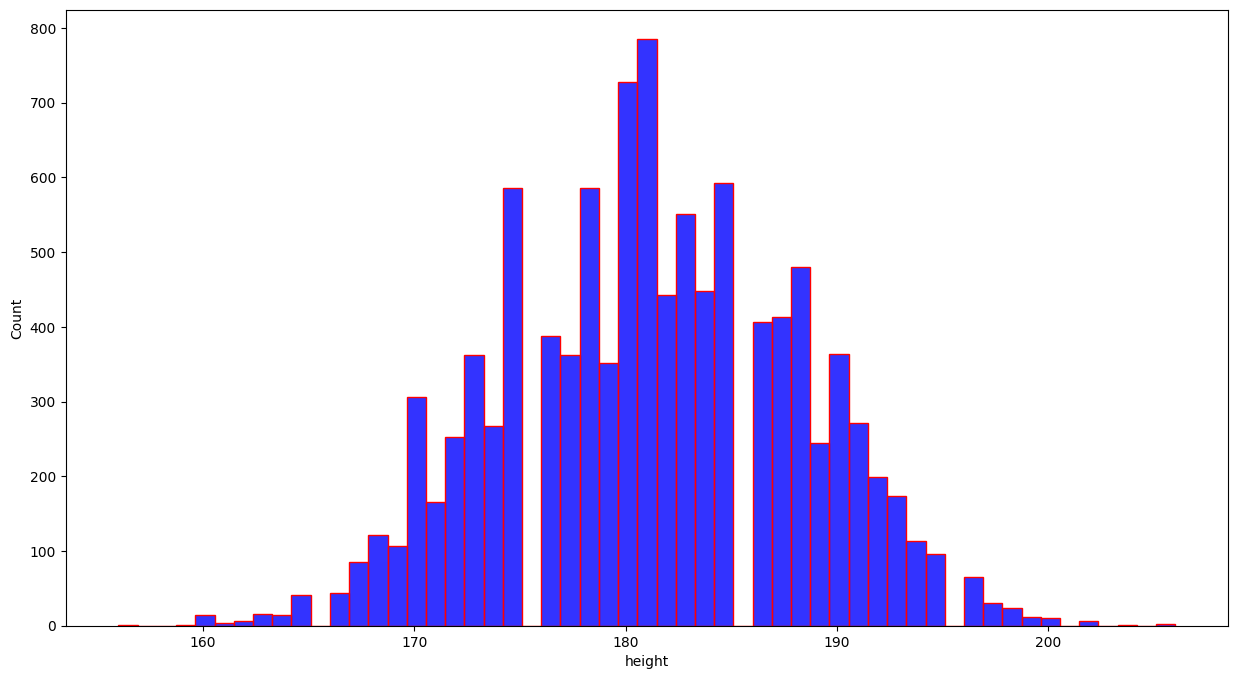

In [42]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='height',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

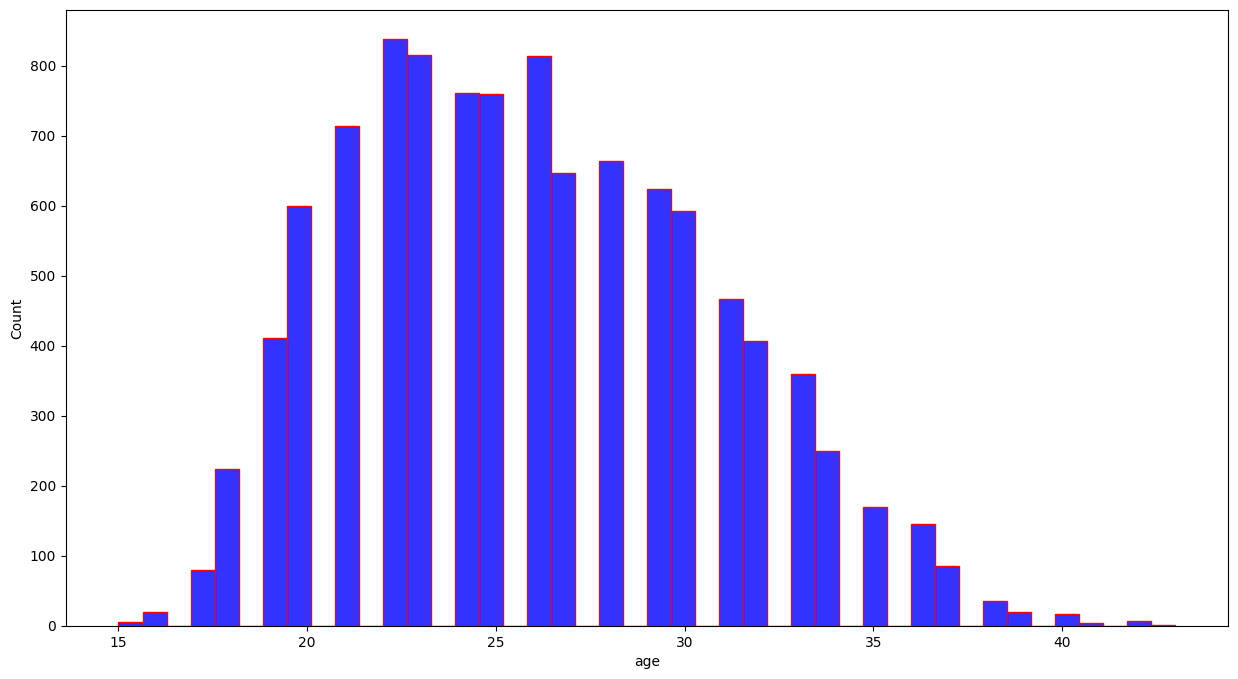

In [43]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='age',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

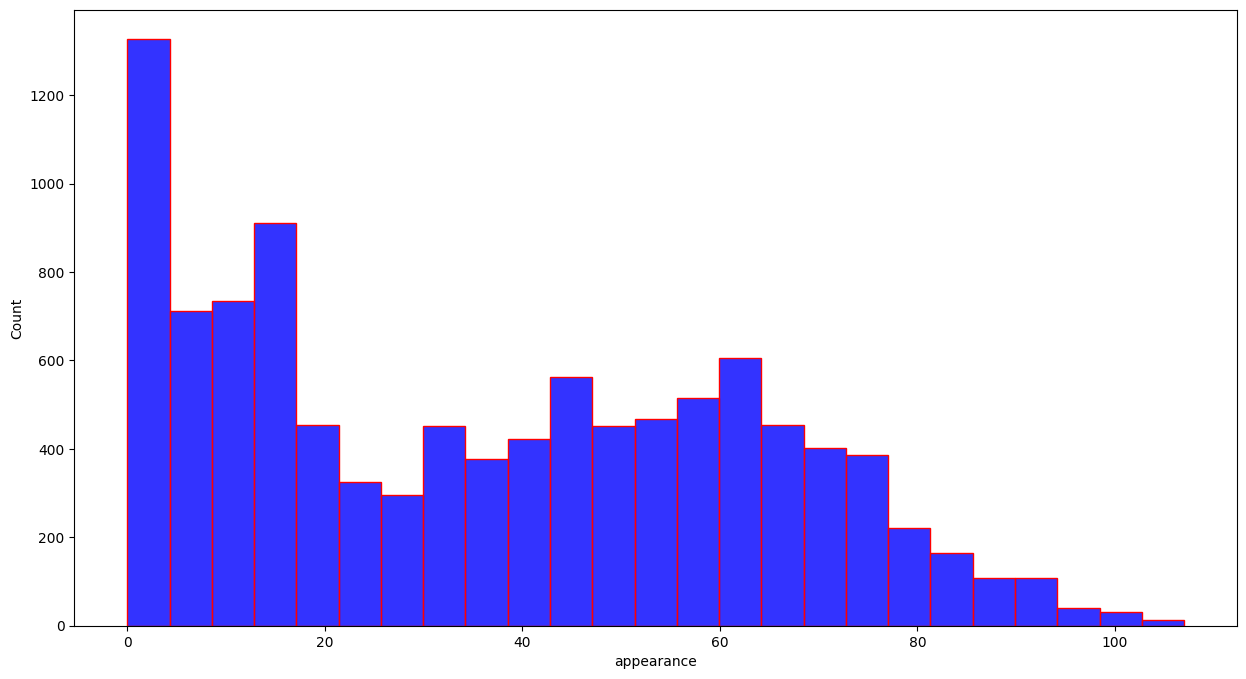

In [44]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='appearance',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

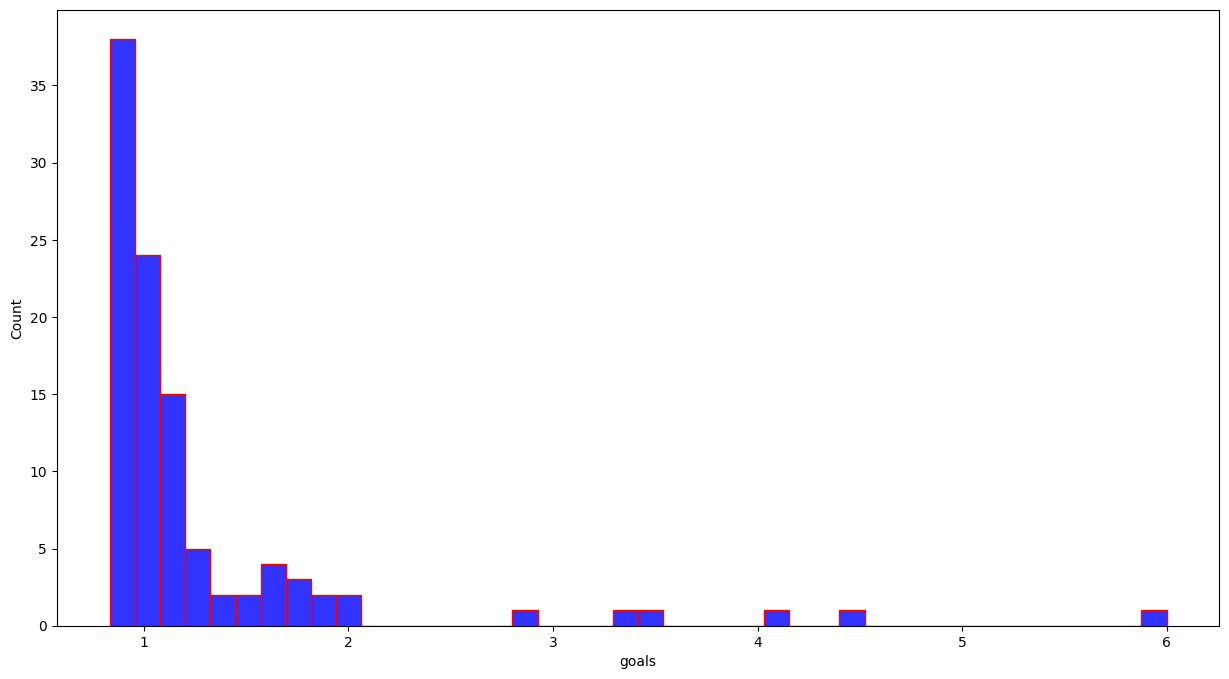

In [45]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players[(df_Football_Players['goals'] > 0.832830) & (df_Football_Players['goals'] < 11.250000)],
    x='goals',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

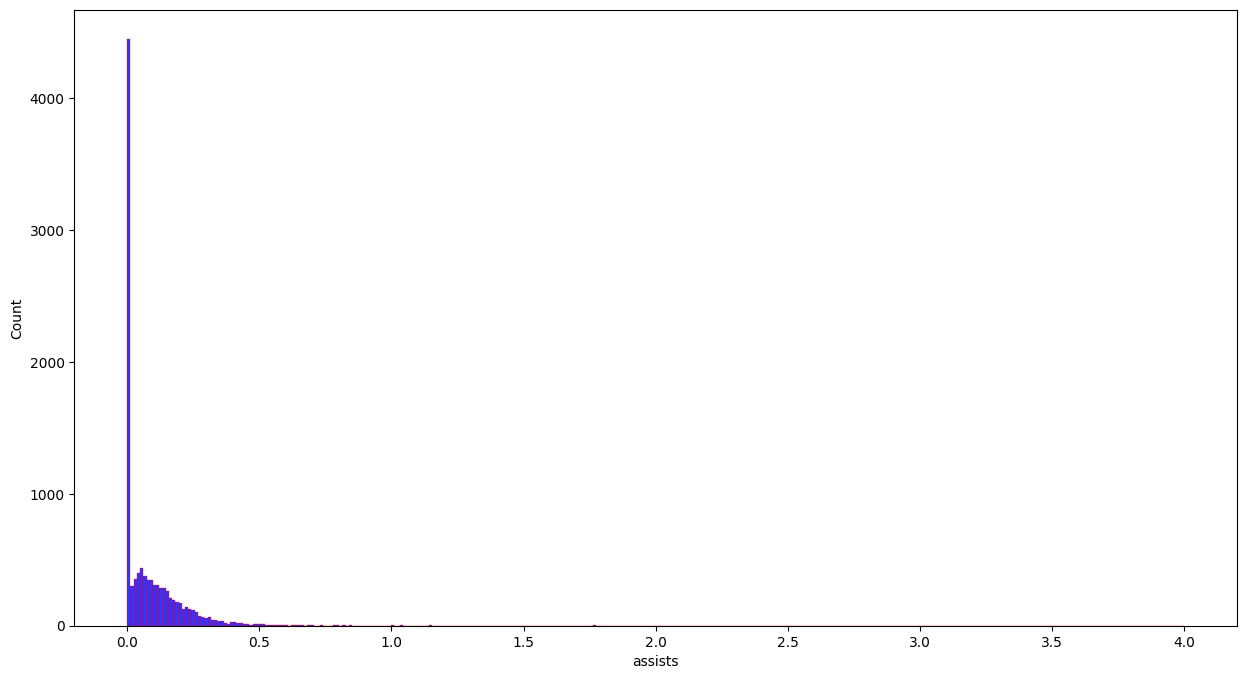

In [46]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='assists',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

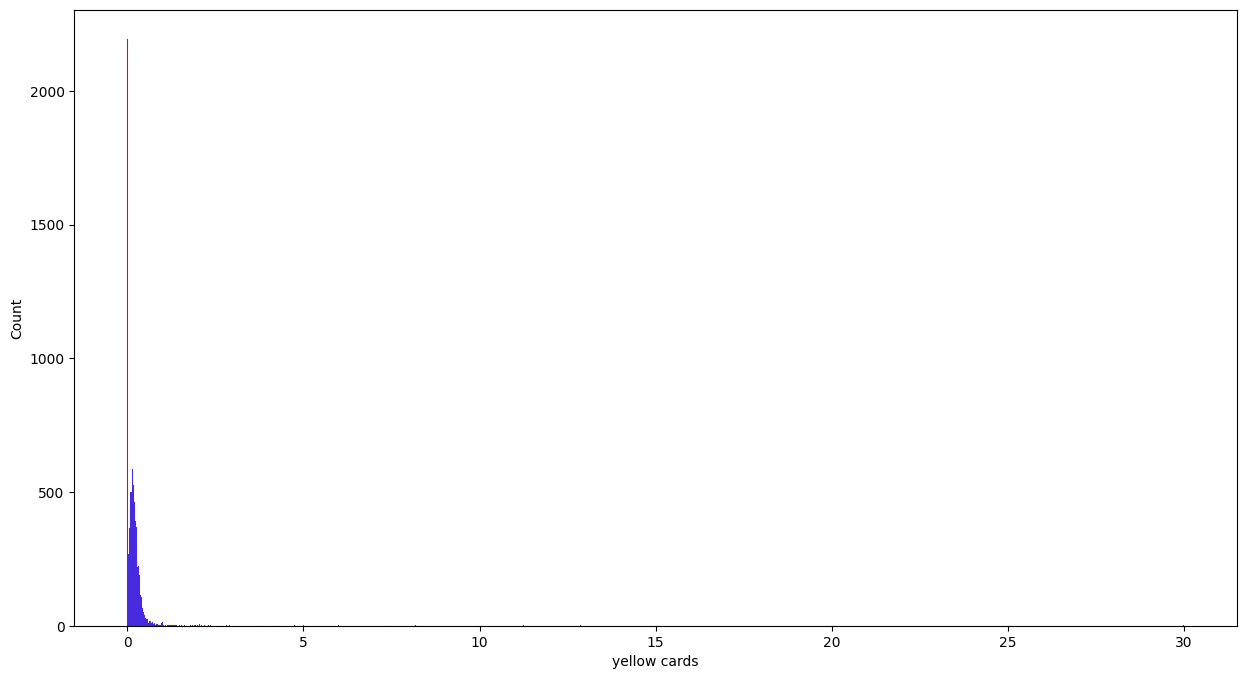

In [47]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='yellow cards',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

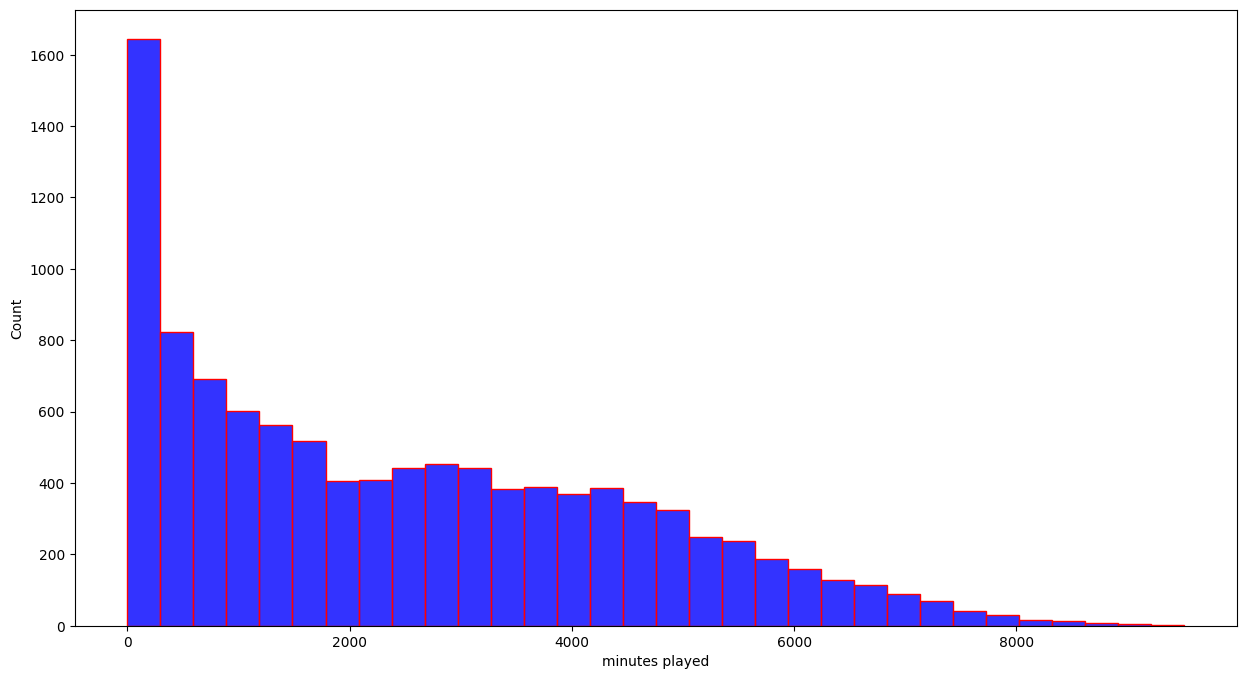

In [48]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='minutes played',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

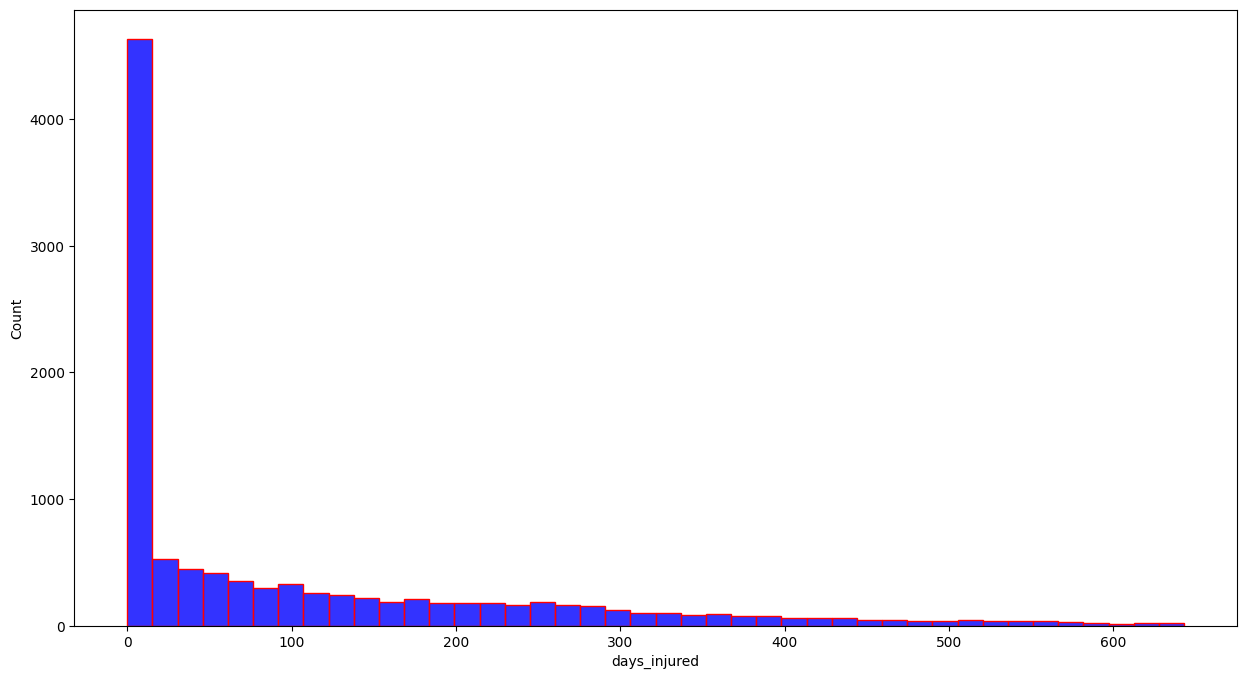

In [49]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='days_injured',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

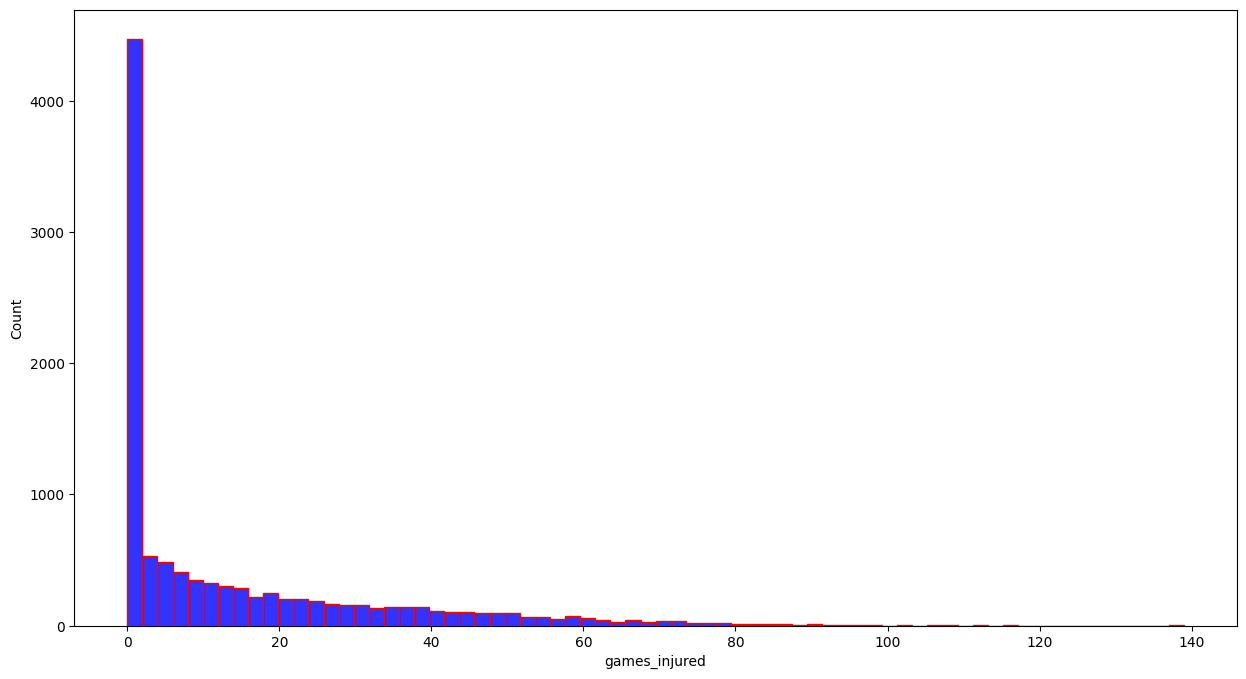

In [50]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='games_injured',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

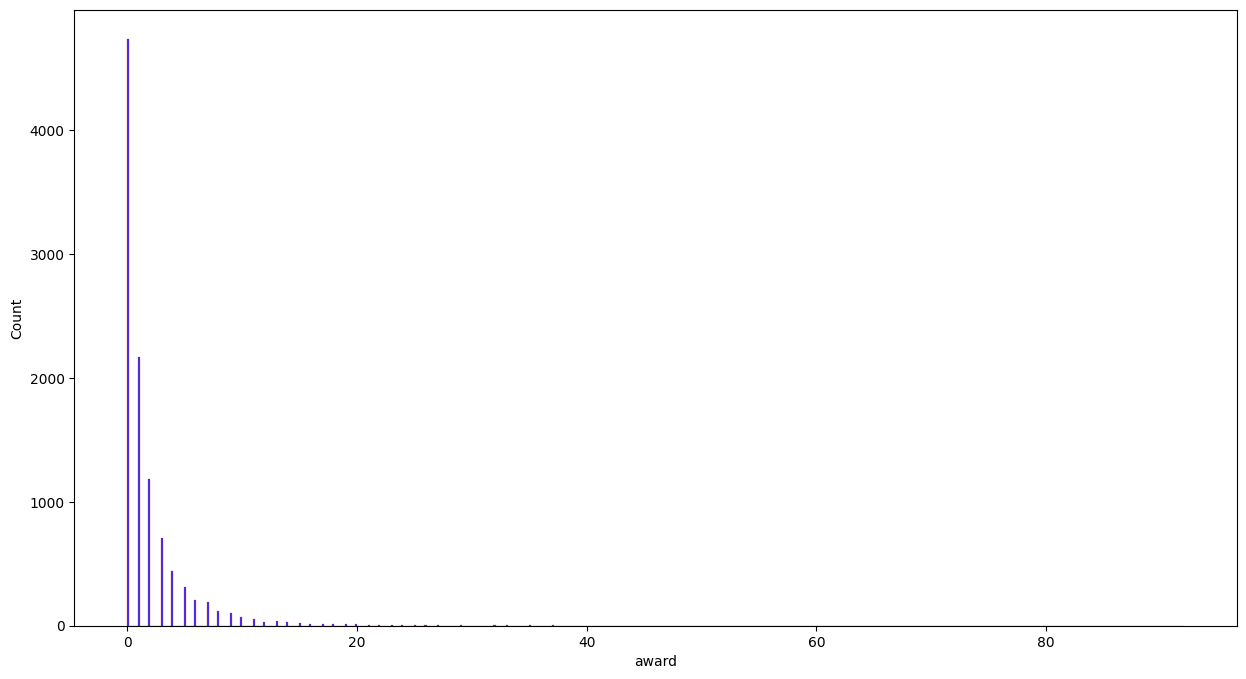

In [51]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='award',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

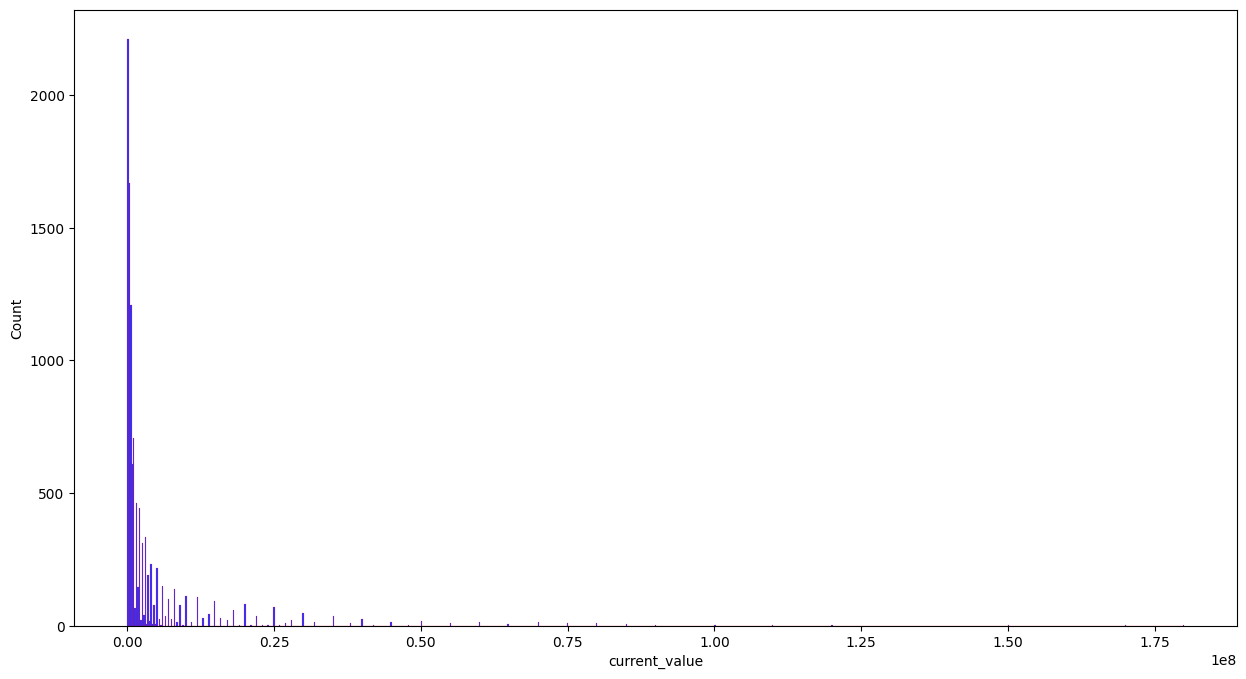

In [52]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='current_value',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

- Go to Accuracy Step to see if there is an outlier

### 2. Bivariate/Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

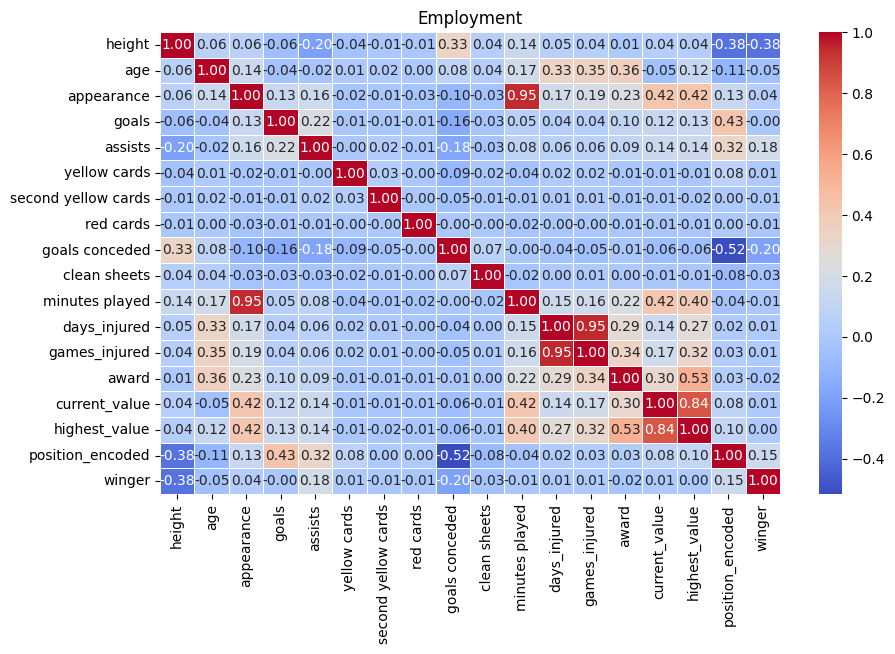

In [53]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Football_Players.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Employment")
plt.show()

Text(0.5, 1.0, 'Correlation between age andcurrent value')

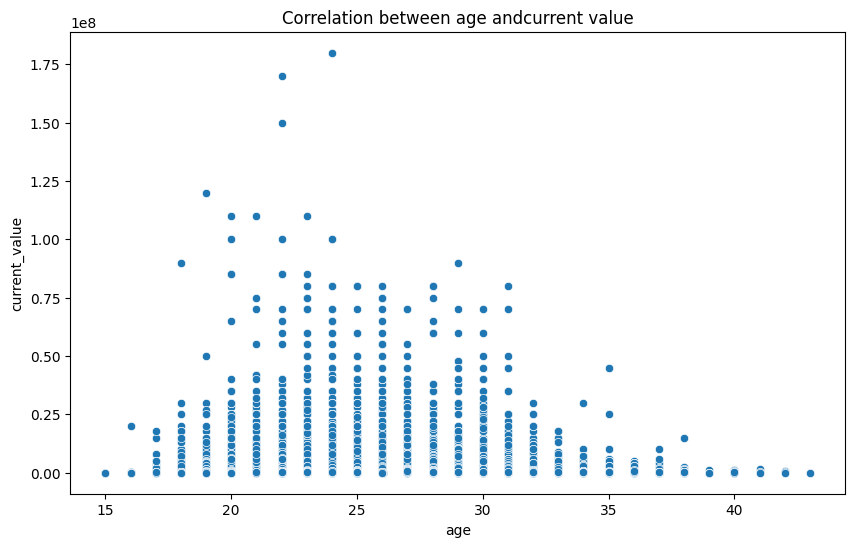

In [54]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='current_value',
#hue='Race Type',
data=df_Football_Players)
plt.title("Correlation between age andcurrent value")

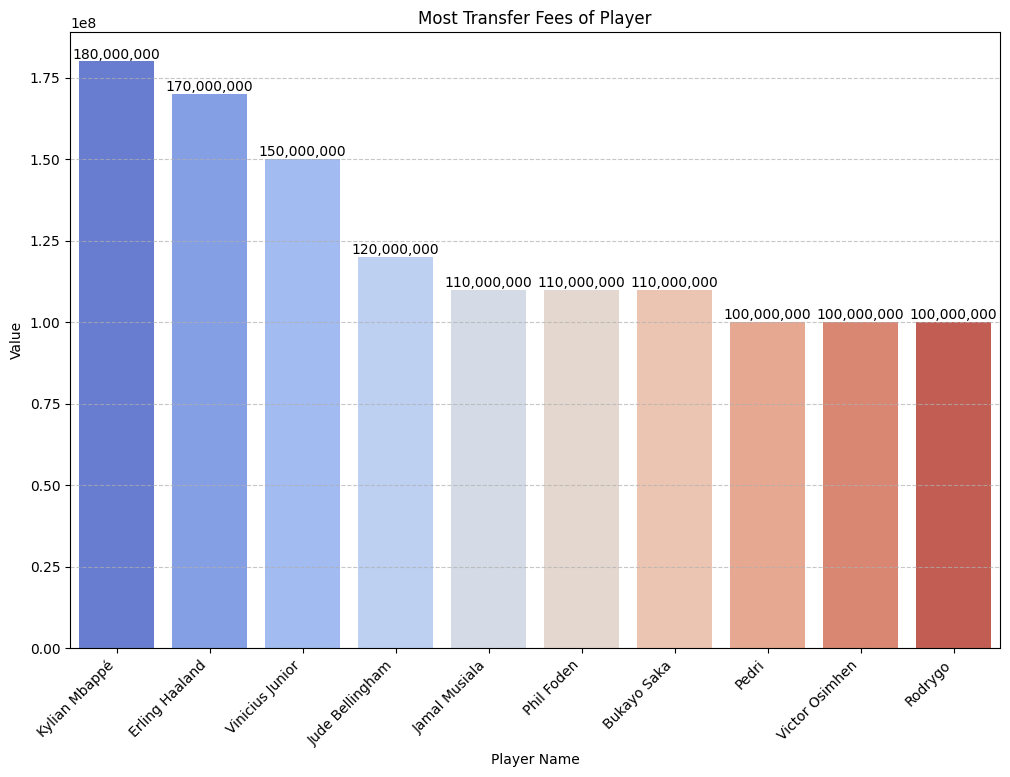

In [55]:
most_player = df_Football_Players.sort_values('current_value', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=most_player['name'], y=most_player['current_value'], palette="coolwarm")

# Add the actual values on top of the bars
for index, value in enumerate(most_player['current_value']):
    plt.text(index, value + 1, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.xlabel("Player Name")
plt.ylabel("Value")
plt.title("Most Transfer Fees of Player")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.show()

- We see that the older the player gets, the lower his market value.

## Save the data 

In [57]:
df_Football_Players.to_csv('data/clean_data.csv')